In [2]:
## Importing the necessary packages and setting up the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import os
import matplotlib as mpl
import sklearn
import seaborn as sns
import tensorflow as tf
import scipy
from tensorflow import keras
import xgboost
import os

mpl.rcParams["axes.grid"] = False
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder_drive_path = "/content/drive/Othercomputers/Acer Predator Helios Sep.2022 onwards/OneDrive/Desktop/ML_conda_projects/spectre_lab/volve_dataset_project"

In [5]:
os.getcwd()

'/content'

In [6]:
dataset_path = Path(folder_drive_path) / "production_data" / "volve_production_data_working.xlsx"

In [7]:
## Installing openpyxl library to read the excel file in pandas
# pip install openpyxl

In [8]:
prod_df = pd.read_excel(dataset_path, parse_dates = [0])

In [9]:
prod_df.head()

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,7405,0.0,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
1,2014-04-08,7405,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
2,2014-04-09,7405,0.0,NaN,NaN,NaN,0.0,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
3,2014-04-10,7405,0.0,NaN,NaN,NaN,0.0,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
4,2014-04-11,7405,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production


In [10]:
prod_df.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,9161.000000,9161.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,9155.000000,9161.000000,9161.000000,9161.000000,15.0
mean,6034.808645,20.168721,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,19.170492,1095.631548,161049.059703,1672.151332,0.0
std,824.532027,8.293401,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,22.580005,1323.538151,188136.410434,1706.982853,0.0
min,5351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.0
25%,5351.000000,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,3.356379,190.690000,29430.590000,19.870000,0.0
50%,5599.000000,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,9.566033,557.550000,87749.660000,1097.790000,0.0
75%,7078.000000,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,26.967948,1345.200000,202482.300000,3260.950000,0.0
max,7405.000000,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,0.0


In [11]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   9161 non-null   datetime64[ns]
 1   NPD_WELL_BORE_CODE        9161 non-null   int64         
 2   ON_STREAM_HRS             9161 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_ANNULUS_PRESS         7890 non-null   float64       
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 8   AVG_CHOKE_UOM             9161 non-null   object        
 9   AVG_WHP_P                 9155 non-null   float64       
 10  AVG_WHT_P                 9146 non-null   float64       
 11  DP_CHOKE_SIZE             9155 non-null   float64       
 12  BORE_OIL_VOL        

In [12]:
prod_df.drop(["AVG_CHOKE_UOM", "FLOW_KIND", "AVG_DP_TUBING", "BORE_WI_VOL", "AVG_ANNULUS_PRESS"], axis = 1, inplace = True)

In [13]:
## Function to break the dataset into separate datasets so that each dataset only contains a single well data
## Returns a dictionary with key as well id and values as the corresponding dataset for that well

def wellwise_break(df):
    wells = df.NPD_WELL_BORE_CODE.unique()
    df_wells = {}
    for well in wells:
        df_wells[well] = df[df["NPD_WELL_BORE_CODE"] == well].reset_index(drop = True)
        df_wells[well] = df_wells[well].drop(["NPD_WELL_BORE_CODE"], axis = 1)
    return df_wells

In [14]:
well_df_dict = wellwise_break(prod_df)

In [15]:
list(well_df_dict.keys())

[7405, 7078, 5599, 5769, 7289, 5351]

In [16]:
# A utility function to save the figures in the "figures" folder inside the working directory

img_path = Path(folder_drive_path) / "figures"
def fig_save(fig, name, path = img_path):
    fig.savefig(os.path.join(path, name + ".png"), dpi = 1000, bbox_inches = "tight")
    print(os.path.join(path, name + ".png"))

/content/drive/Othercomputers/Acer Predator Helios Sep.2022 onwards/OneDrive/Desktop/ML_conda_projects/spectre_lab/volve_dataset_project/figures/Production profile of Well_7405.png
/content/drive/Othercomputers/Acer Predator Helios Sep.2022 onwards/OneDrive/Desktop/ML_conda_projects/spectre_lab/volve_dataset_project/figures/Production profile of Well_7078.png
/content/drive/Othercomputers/Acer Predator Helios Sep.2022 onwards/OneDrive/Desktop/ML_conda_projects/spectre_lab/volve_dataset_project/figures/Production profile of Well_5599.png
/content/drive/Othercomputers/Acer Predator Helios Sep.2022 onwards/OneDrive/Desktop/ML_conda_projects/spectre_lab/volve_dataset_project/figures/Production profile of Well_5769.png
/content/drive/Othercomputers/Acer Predator Helios Sep.2022 onwards/OneDrive/Desktop/ML_conda_projects/spectre_lab/volve_dataset_project/figures/Production profile of Well_7289.png
/content/drive/Othercomputers/Acer Predator Helios Sep.2022 onwards/OneDrive/Desktop/ML_conda_p

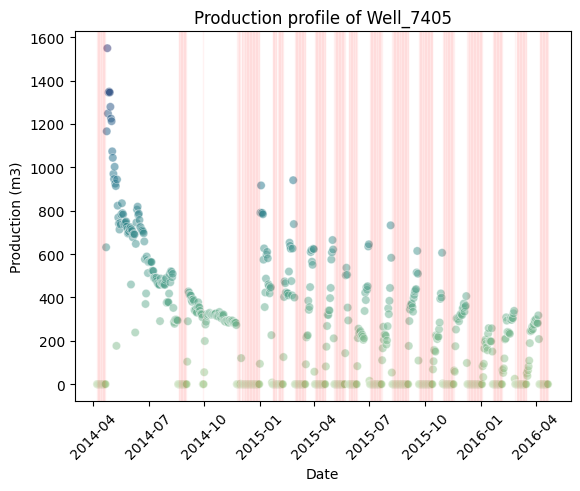

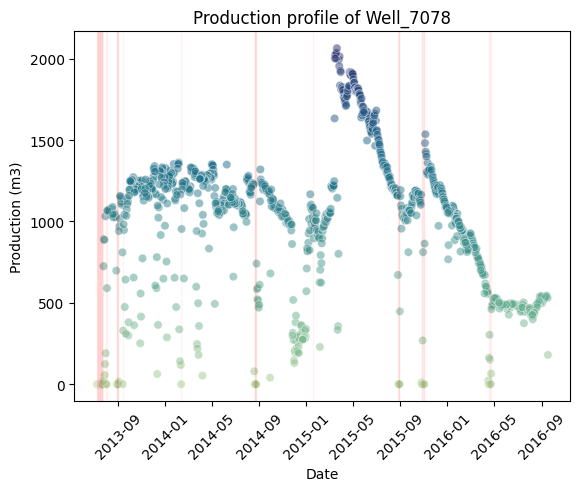

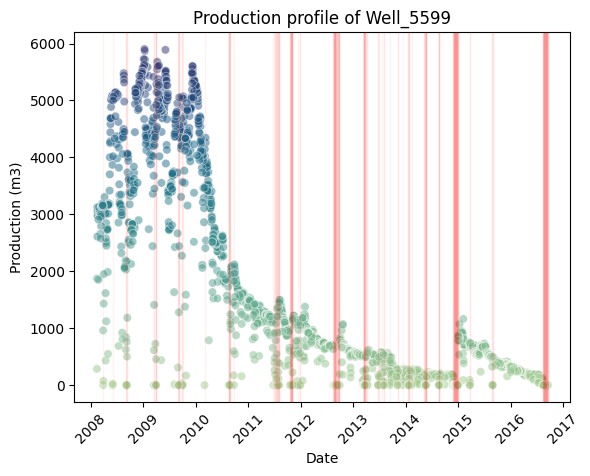

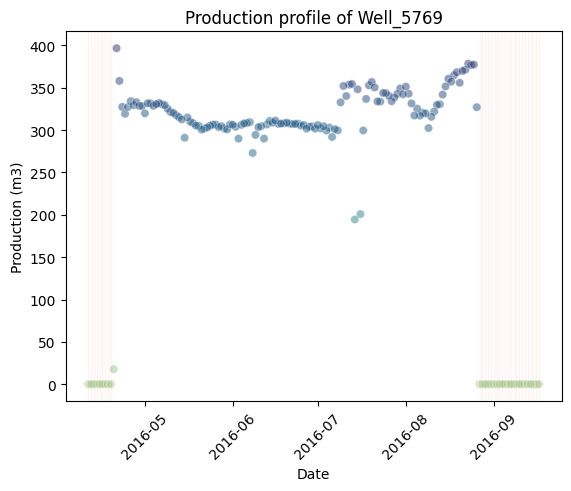

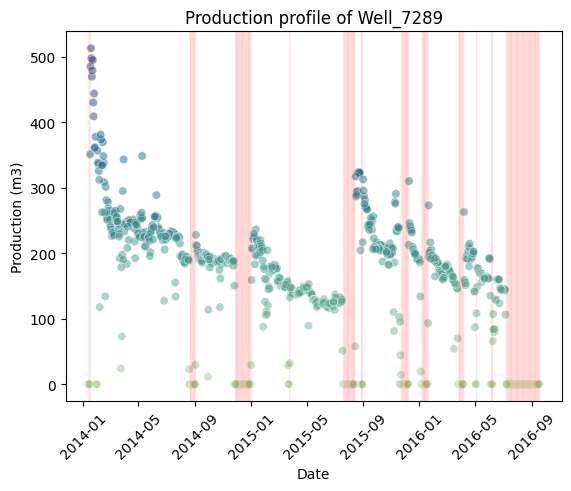

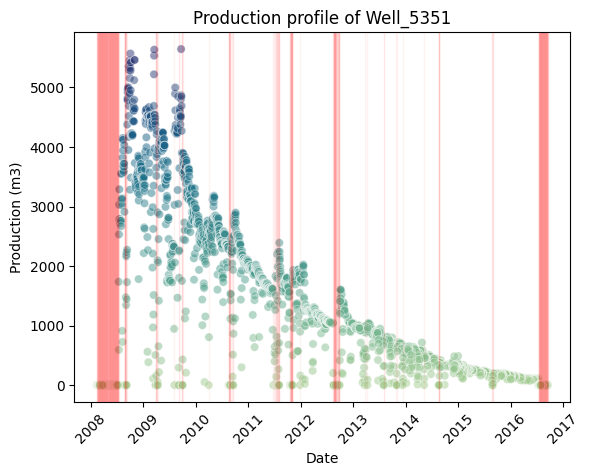

In [17]:
# Visualizing the production profile of all the wells...

for (well, df) in zip(well_df_dict.keys(), well_df_dict.values()):
    df_nf_dates = df[df.ON_STREAM_HRS == 0]["DATEPRD"]
    fig, ax_1 = plt.subplots()
    ax_1 = sns.scatterplot(x = df.DATEPRD, y = df.BORE_OIL_VOL, hue = df.BORE_OIL_VOL, 
                           palette = "crest", alpha = 0.5, legend = False)
    plt.xticks(rotation = 45)
    for date in df_nf_dates:
        ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    ax_1.set(title = f"Production profile of Well_{well}", xlabel = "Date", ylabel = "Production (m3)")
    fig_save(fig, f"Production profile of Well_{well}")

After visualizing the production profiles for all the wells, we choose the well 5351 for building our model as it has:
1. large number of sample points taken over a long period of time, and
2. its production follows the typical declining production trend seen in a typical oil well

In [18]:
df_5351 = well_df_dict[5351].copy()

# Cleaning the Dataset

In [19]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   ON_STREAM_HRS             3056 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2860 non-null   float64       
 5   AVG_WHP_P                 3056 non-null   float64       
 6   AVG_WHT_P                 3056 non-null   float64       
 7   DP_CHOKE_SIZE             3056 non-null   float64       
 8   BORE_OIL_VOL              3056 non-null   float64       
 9   BORE_GAS_VOL              3056 non-null   float64       
 10  BORE_WAT_VOL              3056 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 262.8 KB


AVG_CHOKE_SIZE_P feature has 196 nan values. We'll drop the instances with no choke size values.

AVG_DOWNHOLE_PRESSURE and AVG_DOWNHOLE_TEMPERATURE both have 6 nan values within common instances. This is probably due to some sensor error as the production is non-zero in these instances. We'll also drop these instances.

In [20]:
## Removing Dates on which the well flowed for zero hours from the dataset
df_5351.drop(index = list(df_5351[df_5351.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)

## Removing Dates on which the well produced zero m3 oil from the dataset
df_5351.drop(index = list(df_5351[df_5351.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)

## Removing Instances with null values in CHOKE Size and Downhole Pressure/Temp
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_CHOKE_SIZE_P)].index), axis = 0, inplace = True)
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_DOWNHOLE_PRESSURE)].index), axis = 0, inplace = True)

df_5351.reset_index(drop = True, inplace = True)

In [21]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2717 non-null   datetime64[ns]
 1   ON_STREAM_HRS             2717 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     2717 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2717 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2717 non-null   float64       
 5   AVG_WHP_P                 2717 non-null   float64       
 6   AVG_WHT_P                 2717 non-null   float64       
 7   DP_CHOKE_SIZE             2717 non-null   float64       
 8   BORE_OIL_VOL              2717 non-null   float64       
 9   BORE_GAS_VOL              2717 non-null   float64       
 10  BORE_WAT_VOL              2717 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 233.6 KB


In [22]:
df_5351.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,23.050687,246.505180,101.647452,72.917002,43.807395,85.825170,13.757965,1443.872091,211714.204891,2620.978601
std,3.438220,25.077625,8.742068,27.658527,18.125673,5.836733,16.542586,1288.453491,181932.248688,1282.606590
min,0.625000,0.000000,0.000000,2.485842,0.000000,12.134665,1.450701,4.300000,856.020000,-59.190000
25%,24.000000,240.602292,99.873083,44.923847,31.499809,85.357485,2.616243,330.840000,50906.870000,2126.160000
50%,24.000000,247.191777,101.782098,76.692234,34.951201,87.383659,5.696694,1040.770000,164156.910000,3101.530000
75%,24.000000,261.519886,105.141984,100.000000,49.828866,88.717042,17.151500,2235.480000,327273.000000,3492.760000
max,25.000000,289.897009,106.772733,100.000000,115.184383,93.509584,82.983969,5644.370000,789974.730000,5691.770000


In [23]:
## Some data points have ON_STREAM_HRS > 24...setting them to 24

for index in df_5351[df_5351.ON_STREAM_HRS > 24].index:
    df_5351.loc[index, "ON_STREAM_HRS"] = 24

In [24]:
## Since the Well head Pressure can't be zero for non-zero oil production, we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_WHP_P <= 1].index, "AVG_WHP_P"] = df_5351.AVG_WHP_P.median()

## Similarly, since the Downhole Pressure and Temperature can't be zero for non-zero oil production, 
## we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_PRESSURE == 0].index, "AVG_DOWNHOLE_PRESSURE"] = df_5351.AVG_DOWNHOLE_PRESSURE.median()
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_TEMPERATURE == 0].index, "AVG_DOWNHOLE_TEMPERATURE"] = df_5351.AVG_DOWNHOLE_TEMPERATURE.median()

In [25]:
df_5351.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,23.049285,247.869875,102.209370,72.917002,43.845806,85.825170,13.757965,1443.872091,211714.204891,2620.978601
std,3.437653,17.071416,4.364058,27.658527,18.069896,5.836733,16.542586,1288.453491,181932.248688,1282.606590
min,0.625000,49.450440,20.959721,2.485842,27.185420,12.134665,1.450701,4.300000,856.020000,-59.190000
25%,24.000000,240.886223,99.887850,44.923847,31.508247,85.357485,2.616243,330.840000,50906.870000,2126.160000
50%,24.000000,247.191777,101.782098,76.692234,34.951201,87.383659,5.696694,1040.770000,164156.910000,3101.530000
75%,24.000000,261.519886,105.141984,100.000000,49.828866,88.717042,17.151500,2235.480000,327273.000000,3492.760000
max,24.000000,289.897009,106.772733,100.000000,115.184383,93.509584,82.983969,5644.370000,789974.730000,5691.770000


In [26]:
## Sorting the values in ascending order wrt the date column

df_5351 = df_5351.sort_values(["DATEPRD"])
df_5351.reset_index(inplace = True, drop = True)

In [27]:
## Saving the cleaned 5351 well production data to excel file
working_df_path = dataset_path.parent / "working_df_colab.xlsx"
df_5351.to_excel(str(working_df_path), index = False)  ##index = False doesn't save the index

In [28]:
df = pd.read_excel(working_df_path)

We will use the average flow rate feature AVG_OIL_FLOW_RATE instead of BORE_OIL_VOL as the target variable as it is a more appropriate metric.

In [29]:
## Adding the feature for cummulative oil produced by shifting the cumulative sum of oil produced by 1 row downwards
## Not adding cummulative water and cummulative gas produced because they are highly correlated to Cummulative Oil Produced

# df["CUMM_OIL"] = np.r_[0, np.cumsum(df.loc[:,["BORE_OIL_VOL"]]).values.ravel()[1:]]

In [30]:
## Adding a field called AVG_OIL_FLOW_RATE

df["AVG_OIL_FLOW_RATE"] = df.BORE_OIL_VOL/df.ON_STREAM_HRS

In [31]:
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,AVG_OIL_FLOW_RATE
0,2008-07-13,24.00,260.866875,103.292880,21.052993,100.714919,52.381899,69.539413,1735.26,252235.23,4.00,72.302500
1,2008-07-14,5.57,256.248230,104.017718,27.223459,99.598318,71.115352,68.016167,592.36,88949.00,1.37,106.348294
2,2008-07-15,24.00,254.982785,103.967009,27.277954,98.649941,67.590753,66.948884,2532.21,373786.28,5.84,105.508750
3,2008-07-16,24.00,251.475921,104.210557,30.650552,95.658734,73.782251,63.663812,3030.71,447840.09,9.13,126.279583
4,2008-07-17,24.00,249.346191,104.339184,32.562537,93.585252,78.035440,61.337700,3288.08,474614.43,7.58,137.003333


In [32]:
## Defining a function to plot the Date vs Flow rate chart
def date_vs_prod(df, nf_plot = False):
    fig, ax_1 = plt.subplots()
    sns.scatterplot(data = df, x = "DATEPRD", y = "AVG_OIL_FLOW_RATE", hue = "AVG_OIL_FLOW_RATE", alpha = 0.5, size = 5, ax = ax_1,
                   legend = False, palette="crest")
    if nf_plot:
        nf_dates = df[df.ON_STREAM_HRS == 0]
        nf_dates = nf_dates.iloc[:,0].values
        for date in nf_dates:
            ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    return fig

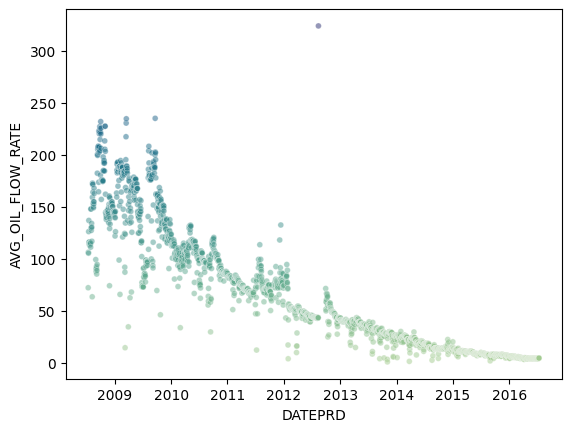

In [33]:
## Testing the above function
plot = date_vs_prod(df)

Now our data looks ready for EDA :)

## EDA

In [34]:
# #Training dataset is taken to be all the data points before after April 2013 and before June 2015.
# # Validation and testing dataset is taken to be all the data points after June 2015

# df_5351_train = df_5351[(df_5351.DATEPRD >= pd.to_datetime("04/01/2013")) & (df_5351.DATEPRD < pd.to_datetime("06/01/2015"))]
# df_5351_val_test = df_5351[df_5351.DATEPRD >= pd.to_datetime("06/01/2015")]

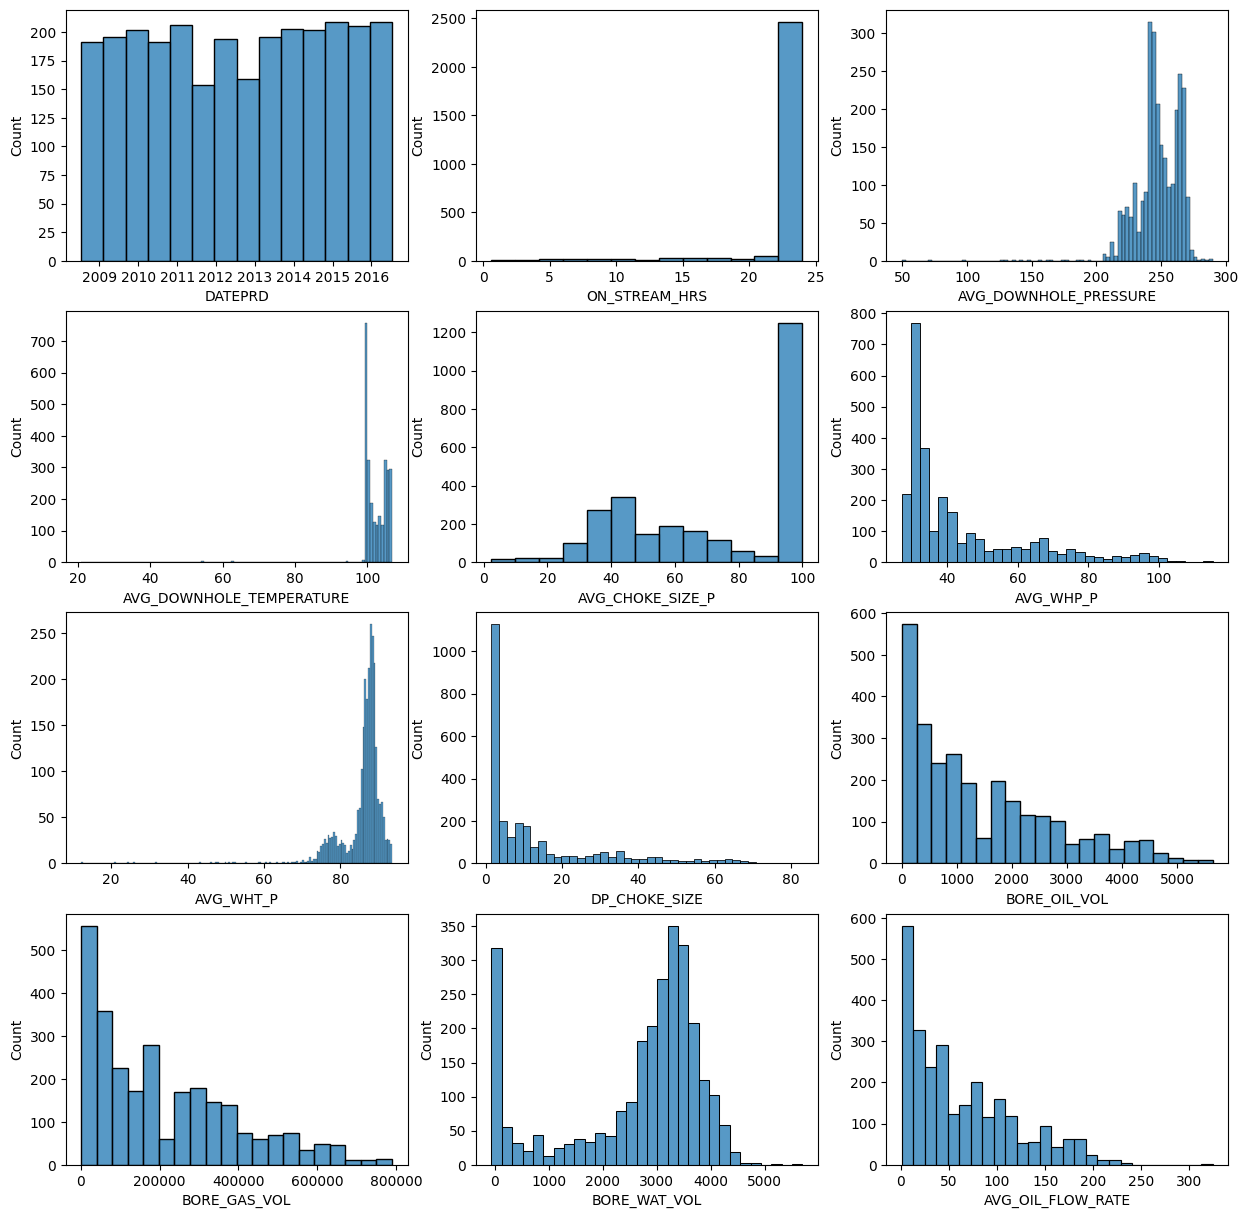

In [35]:
## Visualizing the ditribution of the features in the dataset

cols = list(df.columns)
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (15,15))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.histplot(data=df, x = col, ax = axis)

<ipython-input-36-621f3ffe0104>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_corr.corr()


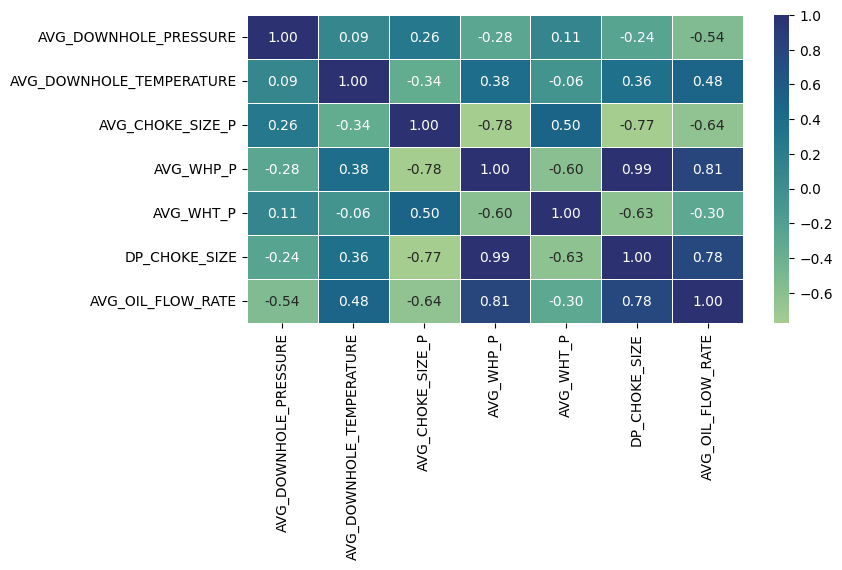

In [36]:
df_corr = df.drop(columns = ["ON_STREAM_HRS", "BORE_GAS_VOL", "BORE_WAT_VOL", "BORE_OIL_VOL"], axis = 1)
corr_matrix = df_corr.corr()
fig = plt.figure(figsize = (8,4))
ax = sns.heatmap(corr_matrix, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 10}, fmt=".2f")

The above boxplot shows that Wellhead Pressure is highly positively correlated to Oil Production, which is to be expected.

Also, Wellhead Pressure is highly positively correlated with Downhole Temperatue. WHy?

Also, Wellhead Pressure is very highly positively correlated to DP Choke Size, which is also to be expected. 

Also, DP Choke Size is negatively correlated to AVG Choke SIZE P which is also expected.

---

One interesting observation is that Well Head Temperature is not correlated with Downhole Temperature. Reasons for this are as follows:

The wellhead temperature of an oil well will be somewhat less than the BHT. The amount of cooling as crude flows to the surface will depend on several factors:

1. The relative amounts of oil and water
2. The specific heats of oil and water
3. The flow rate, the gas/liquid ratio
4. The vertical-flow pressure drop that controls the gas liberated and the attendant cooling effect, and the thermal heat transfer rate from the wellbore.

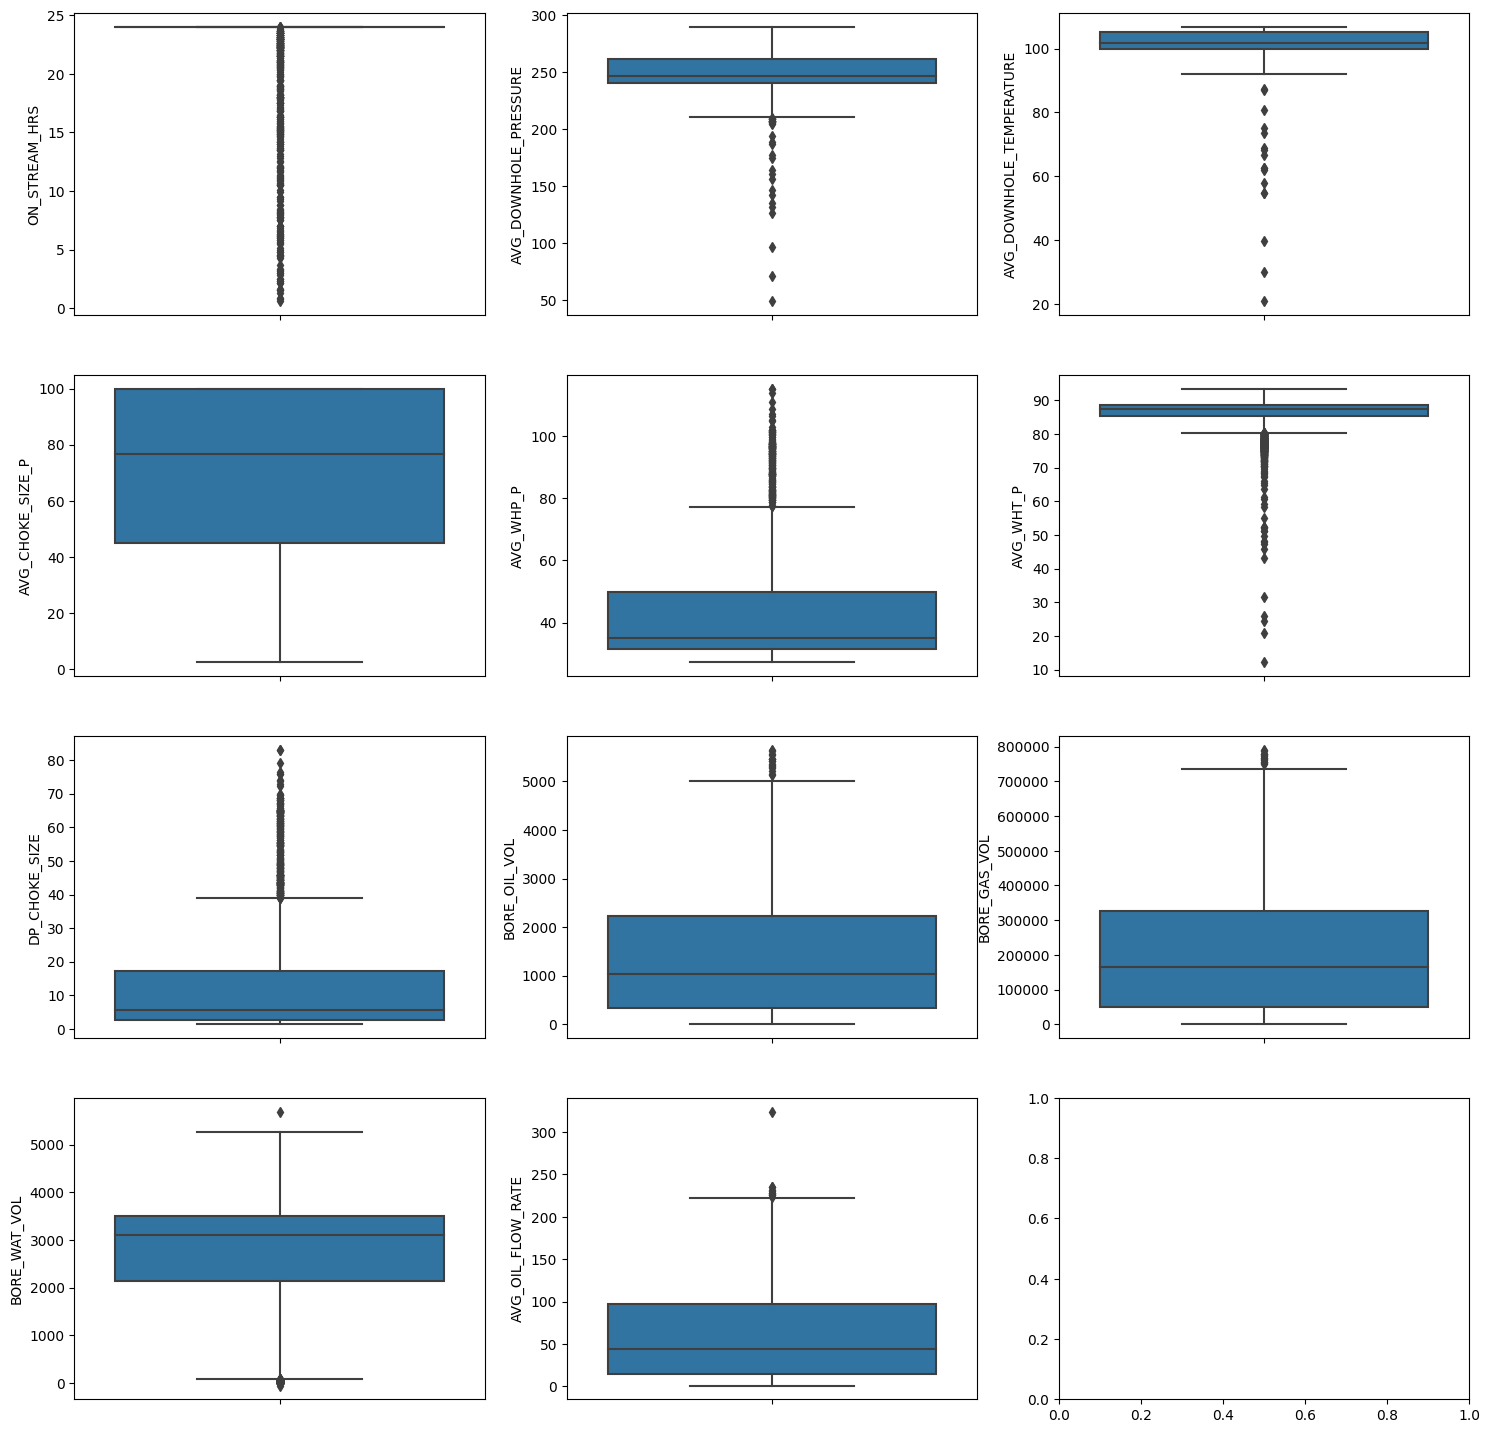

In [37]:
## Visualizing the ditribution of the features in the dataset

cols = list(df.columns[1:])
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (18,18))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.boxplot(data=df, y = col, ax = axis)

***

There is one clear outlier in AVG_OIL_FLOW_RATE...analysing that:

In [38]:
df[df.AVG_OIL_FLOW_RATE > 300]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,AVG_OIL_FLOW_RATE
1365,2012-08-13,0.625,252.892348,101.88657,7.777673,46.152546,83.714672,17.2037,202.53,3754.12,-59.19,324.048


Since the above point is clearly an outlier, we will remove that point

In [39]:
df.drop(index = list(df[df.AVG_OIL_FLOW_RATE > 300].index), axis = 0, inplace = True)

***

Why are there so many values with low downhole temperatures? Is the well head temperature also low at those points? Do these points occur during the winters?

In [40]:
## Analysing the abnormally low values of downhole temperature (values less than 90 deg)

df_temp = df[(df.AVG_DOWNHOLE_TEMPERATURE < 100) & (df.AVG_DOWNHOLE_PRESSURE < 220)]
df_temp

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,AVG_OIL_FLOW_RATE
243,2009-04-04,24.00000,142.195394,62.097413,36.915852,82.265890,79.017304,49.444290,4266.19,603057.78,39.67,177.757917
246,2009-04-09,15.58334,156.704604,68.810278,32.956922,82.462544,71.992248,50.463594,2094.72,291446.14,2.62,134.420477
252,2009-04-16,17.52500,126.438256,57.945863,33.940204,76.983197,70.601237,44.686935,2452.26,337254.14,1.42,139.929244
256,2009-04-20,24.00000,161.168309,75.026294,38.396193,72.358102,78.249001,39.642990,3990.32,539753.59,2.50,166.263333
276,2009-05-11,24.00000,131.509383,62.529313,41.256309,67.970132,80.122545,34.854465,4241.75,575312.38,18.76,176.739583
311,2009-06-15,13.60833,204.891693,96.998262,33.790855,69.501117,72.837203,37.502203,1724.89,248079.85,12.74,126.752511
521,2010-01-20,24.00000,194.357709,87.218937,49.241114,52.011679,86.076854,19.134864,2789.61,389180.91,2595.68,116.233750
542,2010-02-10,24.00000,188.629729,80.615963,41.727705,60.036823,89.643162,27.782542,2521.73,355402.62,2616.02,105.072083
555,2010-02-23,23.08333,71.154596,30.076100,37.115075,63.935236,88.950753,31.642675,2144.80,307980.27,2126.16,92.915537
557,2010-02-25,18.50000,49.450440,20.959721,40.528096,60.117145,87.488834,28.340810,1709.58,243034.51,1755.05,92.409730


From the above table, it is observed that the low values of downhole temperature coexists with low values of downhole pressure. This indicates erroneous values being produced by the downhole equipment measuring the downhole pressure and temperature. Therefore, we are going to replace these values with median values.

In [41]:
## Replacing the outliers in Downhole Pressure and Downhole Temperature with their medians

temp_median = df["AVG_DOWNHOLE_TEMPERATURE"].median()
press_median = df["AVG_DOWNHOLE_PRESSURE"].median()
df["AVG_DOWNHOLE_TEMPERATURE"] = df.AVG_DOWNHOLE_TEMPERATURE.apply(lambda temp: temp_median if temp < 100 else temp)
df["AVG_DOWNHOLE_PRESSURE"] = df.AVG_DOWNHOLE_PRESSURE.apply(lambda press: press_median if press < 220 else press)

***

Doing seasonality analysis on the oil volume produced using FFT

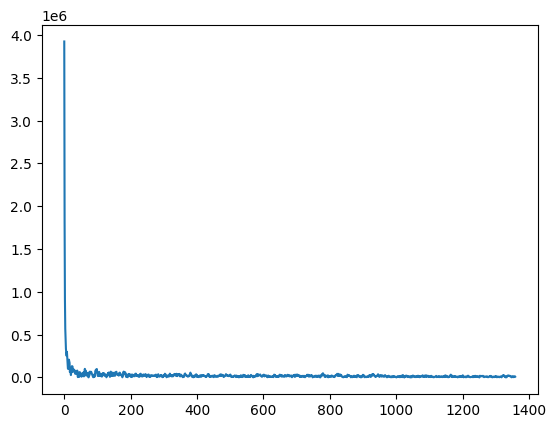

In [42]:
freq = tf.signal.rfft(df.BORE_OIL_VOL)
plt.plot(np.abs(freq)[:10000])

The above graph shows that there is no seasonal trend in the oil production volume

***

Analysing the correlation between wellhead pressure and oil flow rate

<Axes: xlabel='AVG_WHP_P', ylabel='AVG_OIL_FLOW_RATE'>

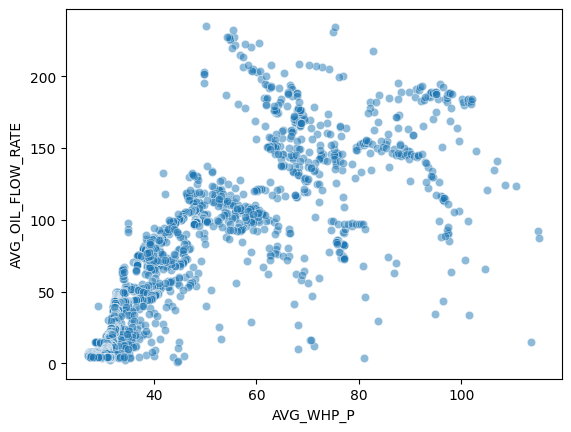

In [43]:
sns.scatterplot(x = df.AVG_WHP_P, y = df.AVG_OIL_FLOW_RATE, alpha = 0.5)

Analysing Wellhead Pressure vs Oil Flow Rate on yearwise basis for more in-depth analysis

In [44]:
df_temp = df.copy()
df_temp["Year"] = df_temp.DATEPRD.apply(lambda x: x.year)

In [45]:
years = np.unique(df_temp.Year)
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

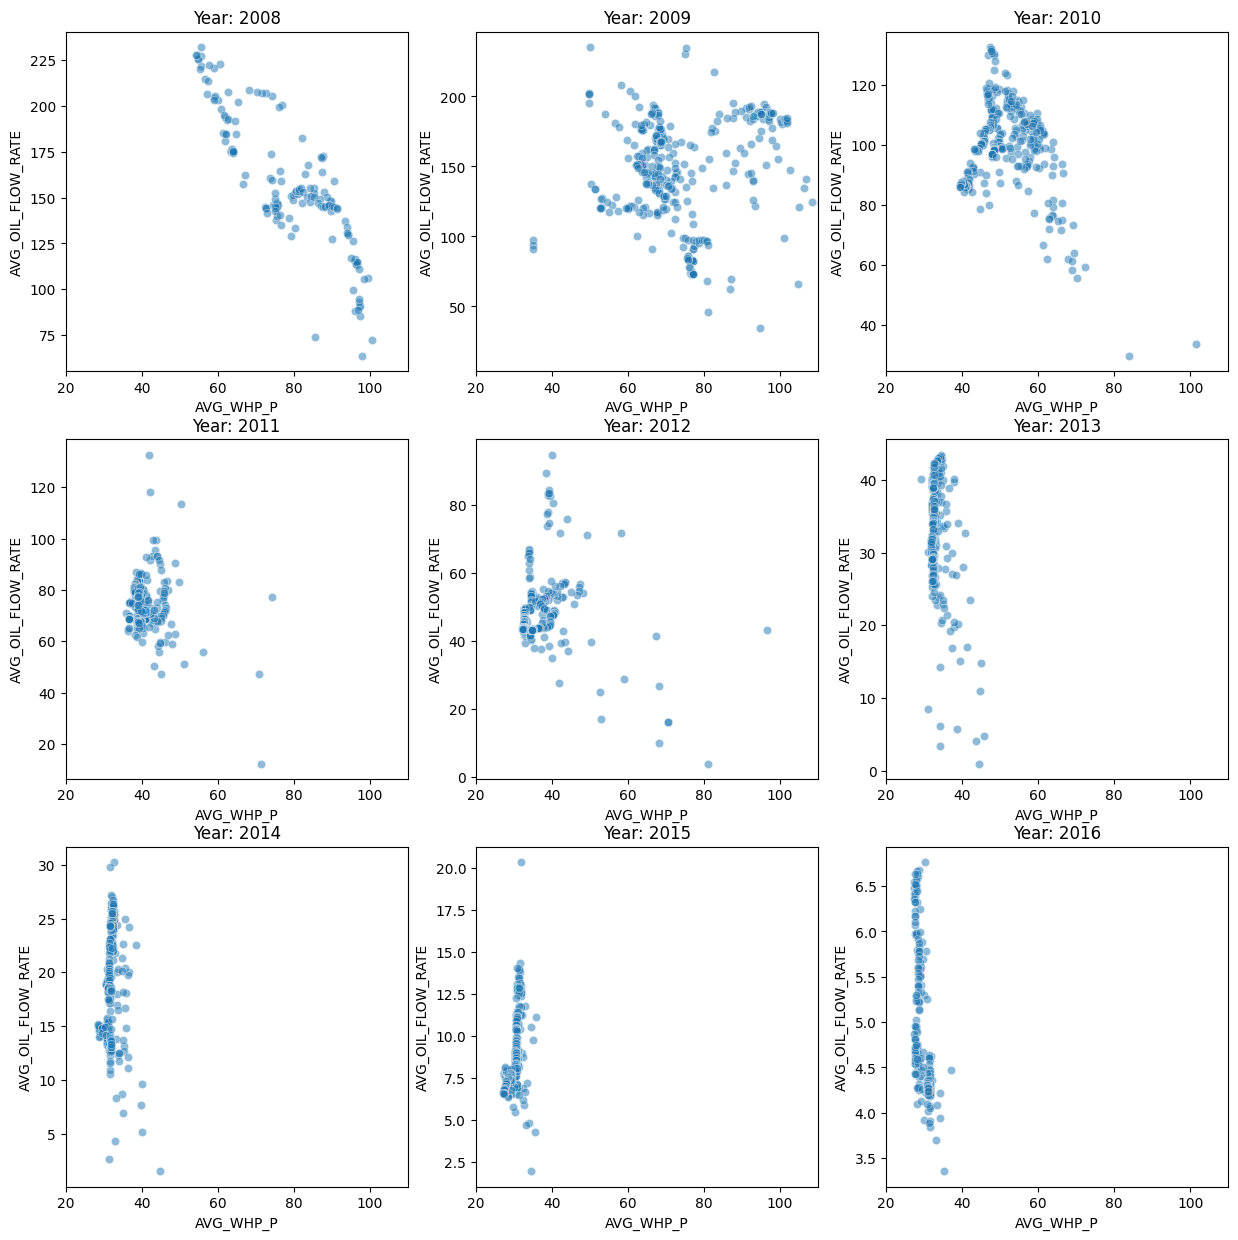

In [46]:
fig, ax = plt.subplots(nrows = 3, ncols= 3, figsize = (15,15))
for (year, axis) in zip(years, ax.ravel()):
    df_year = df_temp[df_temp.Year == year]
    sns.scatterplot(data = df_year, x = "AVG_WHP_P", y = "AVG_OIL_FLOW_RATE", alpha = 0.5, ax=axis, )
    axis.set(title = f"Year: {year}", xlim = [20, 110])

From the above plots, we can see that the high wellhead pressure datapoints (>80) mostly lie in the year 2008-09 plots, when the well was young, and producing high volumes of oil. As the time has progressed, the oil volume has also decreased alongwith the wellhead pressure. 

In [47]:
# ## Implementing the above observations and removing the outliers in Wellhead Pressure values

# df["Year"] = df.DATEPRD.apply(lambda x: x.year)
# df = df[(df.Year <= 2009) | 
#         ((df.Year == 2010) & (df.AVG_WHP_P < 80)) |
#         ((df.Year > 2010) & (df.AVG_WHP_P < 60))]

# df.drop(columns = ["Year"], inplace = True, axis = 1) ## Dropping the Year column again as its no longer needed

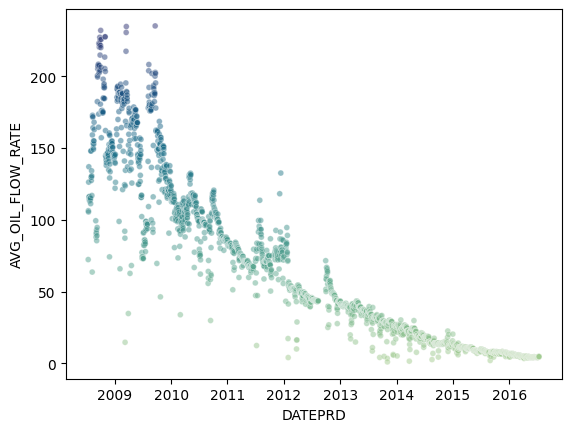

In [48]:
date_vs_prod(df)
plt.show()

***

# Modelling

### Preparing a function to apply all the pre-processing steps in a single go

In [49]:
def preprocessor(df_, train_start_date, val_date, test_date, DATEPROD = True, 
                 Day_col = False, Month_col = False, Year_col = False, scale = True):
    
    """
    Function for performing all the preprocessing steps in one go
    """
    
    # Creating a copy of the passed dataset so that the original dataset is not modified
    df = df_.copy()
    
    ## Removing Dates on which the well flowed for zero hours from the dataset
    df.drop(index = list(df[df.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Dropping the date points where the oil volume produced is equal to zero
    df.drop(index = list(df[df.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Some data points have ON_STREAM_HRS > 24...setting them to 24
    for index in df[df.ON_STREAM_HRS > 24].index:
        df.loc[index, "ON_STREAM_HRS"] = 24
    
    # Breaking the DATEPRD column into Day, Month and Year columns
    if Day_col:
        df["Day"] = df.DATEPRD.dt.day
    if Month_col:
        df["Month"] = df.DATEPRD.dt.month
    if Year_col:
        df["Year"] = df.DATEPRD.dt.year

    ## Removing features which are not needed
    features_x = ["ON_STREAM_HRS", 'BORE_GAS_VOL', 'BORE_WAT_VOL', "BORE_OIL_VOL"]
    df = df.drop(columns = features_x, axis = 1)
    
    ## Plotting graphs for visualizing the points taken into consideration while building the training, validation and 
    ## test datasets
    date_vs_prod(df)
    plt.axvline(pd.to_datetime(train_start_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(val_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(test_date), linestyle = "dotted", color = "orange")
    plt.title("ALL DATA POINTS")
    date_vs_prod(df[df.DATEPRD >= pd.to_datetime(train_start_date)])
    plt.axvline(pd.to_datetime(train_start_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(val_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(test_date), linestyle = "dotted", color = "orange")
    plt.title("DATA POINTS CONSIDERED")
    
    # Training dataset is taken to be all the data points after train_start_date and before val_date
    # Validation and testing dataset is taken to be all the data points after val_date
    df_train = df[(df.DATEPRD >= pd.to_datetime(train_start_date)) & (df.DATEPRD < pd.to_datetime(val_date))].copy()
    df_val_test = df[df.DATEPRD >= pd.to_datetime(val_date)].copy()
    
    ##_______ TO BE DONE AFTER SEPERATING TRAIN DATASET _________
    
#     ## Replacing the zero/na values in downhole pressure and temperature with the mean values
#     dhp_mean = df_train["AVG_DOWNHOLE_PRESSURE"].mean()
#     dht_mean = df_train["AVG_DOWNHOLE_TEMPERATURE"].mean()

#     for df_ in [df_train, df_val_test]:
#         dhp_index = df_[(df_.AVG_DOWNHOLE_PRESSURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index
#         dht_index = df_[(df_.AVG_DOWNHOLE_TEMPERATURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index

#         for index in dhp_index:
#             df_.loc[index, "AVG_DOWNHOLE_PRESSURE"] = dhp_mean

#         for index in dht_index:
#             df_.loc[index, "AVG_DOWNHOLE_TEMPERATURE"] = dht_mean
    
#     ## Removing outliers from the features in the training datset
#     df_train = df_train[
#         (df_train.AVG_DOWNHOLE_PRESSURE > 200) &
#         (df_train.AVG_DOWNHOLE_TEMPERATURE > 90) &
#         (df_train.AVG_WHP_P != 0) &
#         (df_train.AVG_WHP_P < 80) &
#         (df_train.AVG_WHT_P > 70) &
#         (df_train.DP_CHOKE_SIZE < 70)
#     ]
    
    # Creating X_train, y_train, X_val, y_val, X_test, y_test
    # Validation data is taken to be data points from val_date till test_date
    # Test data is taken to be data points from test_date till the last available date
    features_list = list(df_train.columns)
    features_list.remove("AVG_OIL_FLOW_RATE")

    y_train = df_train["AVG_OIL_FLOW_RATE"]
    X_train = df_train.loc[:,features_list]

    df_val = df_val_test[df_val_test.DATEPRD < pd.to_datetime(test_date)]
    df_test = df_val_test[df_val_test.DATEPRD >= pd.to_datetime(test_date)]

    y_val = df_val["AVG_OIL_FLOW_RATE"]
    X_val = df_val.loc[:,features_list]

    y_test = df_test["AVG_OIL_FLOW_RATE"]
    X_test = df_test.loc[:,features_list]
    
    # Dropping DATEPROD col
    if DATEPROD:
        for df_ in [X_train, X_val, X_test]:
            df_.drop(["DATEPRD"], axis = 1, inplace = True)
    features_ = list(X_train.columns)
    print(f" Features in the output datasets: {features_}")
    
    # Scaling the data using StandardScaler from sklearn
    if scale:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
    
    # Printing the length of X_train, X_val and X_test datasets
    print(f"Total data points taken for training/validation/testing: {len(X_train) + len(X_val) + len(X_test)}")
    for X_name, X_df in zip(["Train", "Validation", "Test"], [X_train, X_val, X_test]):
        print(f"Data points in {X_name} are: {len(X_df)}")
    
    return (features_, X_train, y_train, X_val, y_val, X_test, y_test)

In [50]:
## Function for plotting predicted values vs actual values

def predict_plot(actual, predicted, fig_title = ""):
    """
    predict_plot(actual_values, predicted_values)
    """
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap("cividis")
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.scatter(actual, predicted, alpha = 0.2 , c = cmap((np.abs(actual)-np.abs(predicted))/np.abs(actual)))
    ax.set_xlabel("Actual values")
    ax.set_ylabel("Predicted values")
    ax.plot(np.linspace(actual.min(), actual.max(), 100), np.linspace(actual.min(), actual.max(), 100), "r--")
    ax.set_title(fig_title)
    sm = mpl.cm.ScalarMappable(cmap = cmap)
    cbar = plt.colorbar(sm)
    cbar.set_label('Error in predictions scaled to [0,1]', rotation=270)
    cbar.ax.set_yticklabels(['0','','','',"",'1'])
    plt.show()

### Preparing the data and trying non-time series models (linear, SVM, ensembles, NN)

In [51]:
df.DATEPRD

0      2008-07-13
1      2008-07-14
2      2008-07-15
3      2008-07-16
4      2008-07-17
          ...    
2712   2016-07-09
2713   2016-07-10
2714   2016-07-11
2715   2016-07-12
2716   2016-07-13
Name: DATEPRD, Length: 2716, dtype: datetime64[ns]

 Features in the output datasets: ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
Total data points taken for training/validation/testing: 1261
Data points in Train are: 705
Data points in Validation are: 269
Data points in Test are: 287


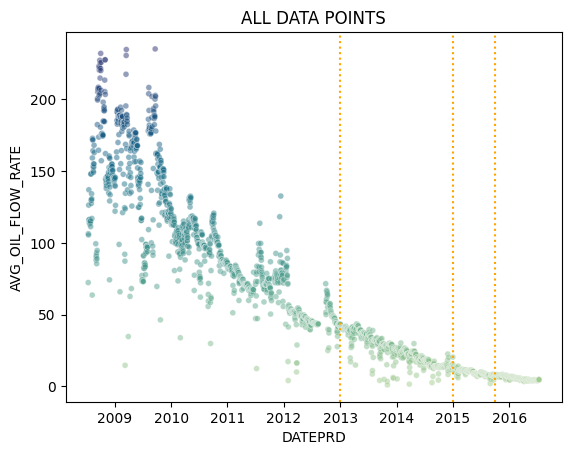

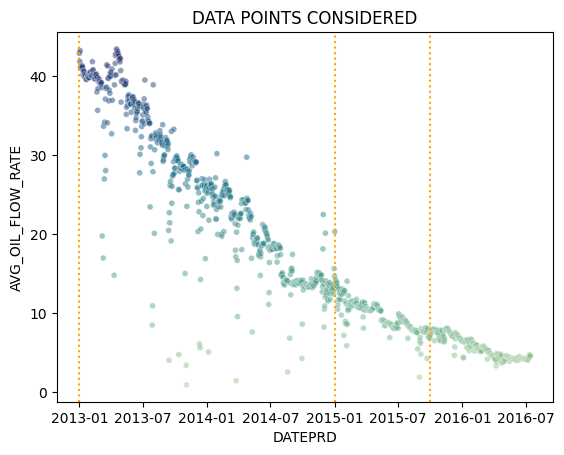

In [52]:
(features, X_train, y_train, X_val, y_val, X_test, y_test) = preprocessor(df, train_start_date="01/01/2013",
                                                             val_date = "01/01/2015", test_date = "10/01/2015",
                                                               Day_col = False, Month_col = False, Year_col = False)

***

## Implementing Decline Curve Analysis (DCA)

In [53]:
from scipy.optimize import curve_fit   #Importing the curve fit function from scipy package

def hyperbolic_equation(t, qi, b, di):
    """
    Hyperbolic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        b: Float. Hyperbolic decline constant
        di: Float. Nominal decline rate at time t=0
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/((1.0+b*di*t)**(1.0/b))

def exponential_equation(t, qi, di):
    """
    Exponential decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        di: Float. Nominal decline rate (constant)
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi*np.exp(-di*t)

def dca_plotter(flow_rates):
    """
    Plots DCA curves hyperbolica and exponential. Returns the constants of hyperbolic curve equation [qi_h, b, di_h]
    
    """

    def get_max_initial_production(flow_rates, number_days):
        return flow_rates[:number_days].max()
    
    def hyp_exp_plot(flow_rates, hyp_curve_fit, exp_curve_fit):
        """
        exp_curve_fit = [qi, di]
        hyp_curve_fit = [qi, b, di]
        """
        [qi_e, di_e] = exp_curve_fit
        [qi_h, b, di_h] = hyp_curve_fit
        
        fig = plt.figure(figsize = (10, 5))
        
        x = np.arange(len(flow_rates))
        fig = sns.scatterplot(x = x, y = flow_rates, label = "Flow Rate", color = "red", alpha = 0.8)
        fig = plt.plot(x, hyperbolic_equation(x, qi_h, b, di_h), label = f"Hyperbolic with b={b:.2E}",
                       color = "blue", linestyle = "dashed")
        fig = plt.plot(x, exponential_equation(x, qi_e, di_e), label = "Exponential", linestyle = "dashed", color = "k")
        plt.legend()
        return fig
    
    ## Getting the qi value
    qi = get_max_initial_production(flow_rates, 120)

    exp_values, exp_std = curve_fit(exponential_equation, np.arange(len(flow_rates)), flow_rates, bounds = (0, [qi, 100]))
    hyp_values, hyp_std = curve_fit(hyperbolic_equation, np.arange(len(flow_rates)), flow_rates, bounds = (0, [qi, 1, 100]))
    
    print(f"For exponential curve: qi = {exp_values[0]}, di = {exp_values[1]}")
    print(f"For hyperbolic curve: qi = {hyp_values[0]}, b = {hyp_values[1]}, di = {hyp_values[2]}")
    
    hyp_exp_plot(flow_rates, hyp_values, exp_values)
    
    return hyp_values

For exponential curve: qi = 42.920034519950654, di = 50.0
For hyperbolic curve: qi = 43.468333328733586, b = 6.302755946740992e-09, di = 0.001676316393642292


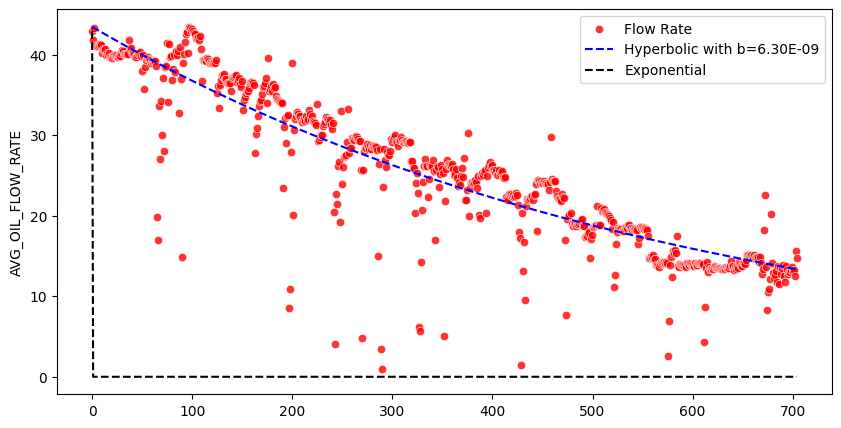

In [54]:
hyp_values = dca_plotter(y_train)

MSE for DCA Hyperbolic curve on training data: 17.03
MSE for DCA Hyperbolic curve on validation data: 2.34


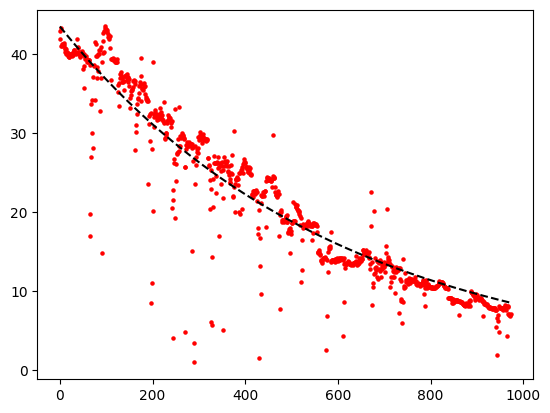

In [55]:
## Testing the hyperbolic equation obtained on training + validation data

from sklearn.metrics import mean_squared_error

Y = np.r_[y_train, y_val]
x = np.arange(len(Y))

[qi, b, di] = hyp_values

hyp = hyperbolic_equation(x, qi, b, di)
plt.scatter(x = x, y = Y, s = 5, color = "red")
plt.plot(x, hyp, linestyle = "dashed", color = "k")

## Calculating the MSE if we only use DCA for flowrate prediction

hyp_train_pred = hyp[:len(y_train)]
hyp_val_pred = hyp[len(y_train):]

hyp_train_mse = mean_squared_error(y_train, hyp_train_pred)
hyp_val_mse = mean_squared_error(y_val, hyp_val_pred)

print(f"MSE for DCA Hyperbolic curve on training data: {hyp_train_mse:.2f}")
print(f"MSE for DCA Hyperbolic curve on validation data: {hyp_val_mse:.2f}")

The Hyperbolic equation obtained from decline curve analysis fits the data points on the training and validation data very well

Thus, the hyperbolic equation can be used to check the performance of our models

### Including the flow rates as predicted by DCA in the training, validation, and test data

The DCA will only be fitted on the training data for model selection and training+validation data for test data performance evaluation

Here, we will fit the DCA only on the training data and then use the hyperbolic equation obtained to get predicted flow rates

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

[qi, b, di] = hyp_values  ##hyp_values is obtained by fitting the curve using dca_plotter() function

X_ = np.r_[X_train, X_val, X_test]
hyp_q = hyperbolic_equation(np.arange(len(X_)), qi, b, di)
hyp_q_scaled = scaler.fit_transform(hyp_q.reshape(-1, 1))
X_ = np.c_[X_, hyp_q_scaled]

X_train_dca = X_[:len(X_train), :]
X_val_dca = X_[len(X_train):(len(X_val)+len(X_train)), :]
X_test_dca = X_[(len(X_train) + len(X_val)):, :]

## Modifying the features list to include the DCA column feature name
if features.count("DCA_FLOW_RATE") == 0:
    features = features + ["DCA_FLOW_RATE"]

In [57]:
X_train_dca.shape, X_val_dca.shape, X_test_dca.shape

((705, 7), (269, 7), (287, 7))

In [58]:
features

['AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'DCA_FLOW_RATE']

***

Performing a final correlation analysis on the training and validation data

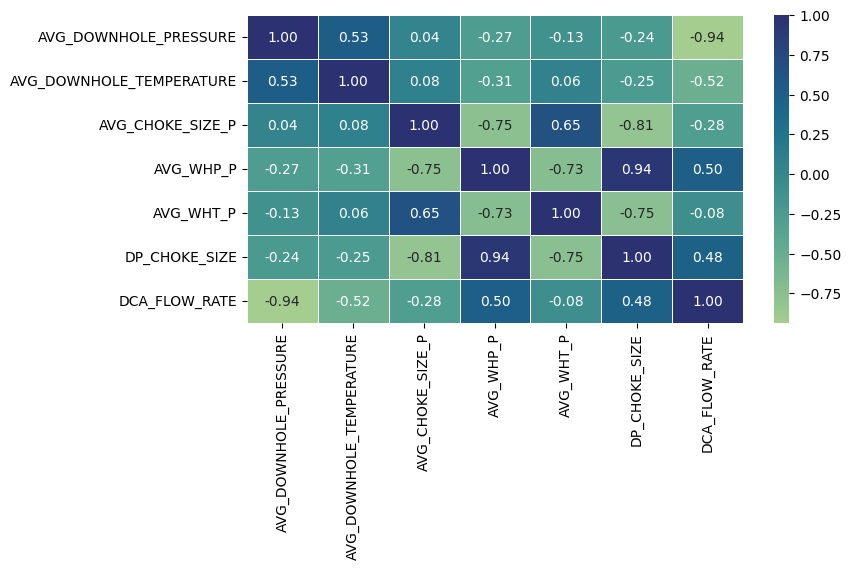

In [59]:
X_ = np.r_[X_train_dca, X_val_dca]
df_ = pd.DataFrame(X_, columns=features)
df_corr = df_.corr()
fig = plt.figure(figsize = (8,4))
ax = sns.heatmap(df_corr, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 10}, fmt=".2f")

***

### Creating a function to remove some specified features from a dataset

In [60]:
def feature_subsetter(features_list, features_sub, X_train, X_val, X_test):
    """
    `features_list` is a list containing the names of all the features. The order of the features in this list should 
        necessarily be the same to the order of the feautres in the dataset.
    `features_sub` is a list containing the names of the features to be kept. All other features will be removed.
    
    Return X_train, X_val, X_test
    """
    if len(features_list) != X_train.shape[1]:
        print(f"Error...no. of features in features list is {len(features_list)} and its not matching with the no. of columns in X_train {X_train.shape[1]}")
        
    features_sub_index = [features_list.index(f) for f in features_sub]

    ## Subsetting the original arrays
    X_train = X_train[:, features_sub_index]
    X_val = X_val[:, features_sub_index]
    X_test = X_test[:, features_sub_index]
    return X_train, X_val, X_test

In [61]:
features_sub = [ 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', "AVG_DOWNHOLE_TEMPERATURE"]  ## Features to keep are provided in this list
X_train_dca, X_val_dca, X_test_dca = feature_subsetter(features,  features_sub, X_train_dca, X_val_dca, X_test_dca)

In [62]:
X_train_dca.shape, X_val_dca.shape, X_test_dca.shape

((705, 5), (269, 5), (287, 5))

In [63]:
features = features_sub

***

## 1. Trying Linear Models

### SGD Regressor with no regularization

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = None)
sgd_reg.fit(X_train_dca, y_train)

SGDRegressor(penalty=None)

In [ ]:
mean_squared_error(y_val, sgd_reg.predict(X_val_dca))

1.2563680820645038

In [ ]:
mean_squared_error(y_train, sgd_reg.predict(X_train_dca))

8.38655164636927

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


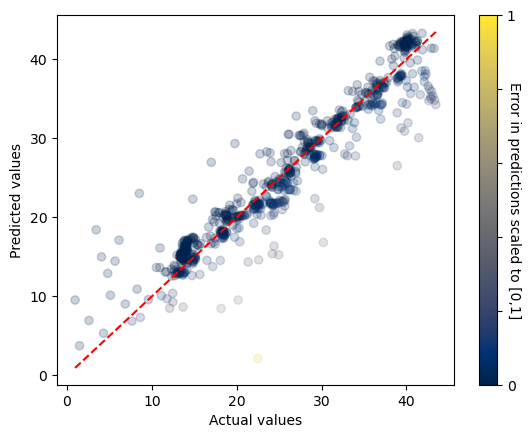

In [ ]:
predict_plot(y_train, sgd_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


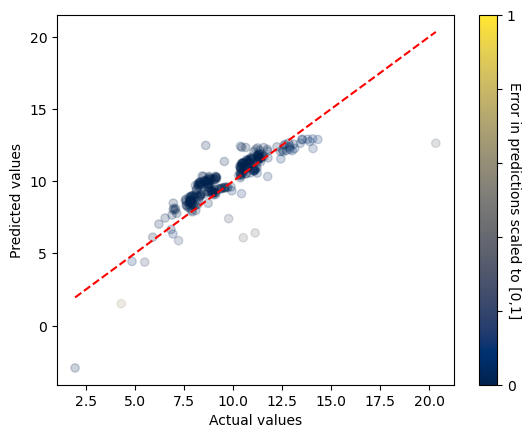

In [ ]:
predict_plot(y_val, sgd_reg.predict(X_val_dca))

<AxesSubplot: >

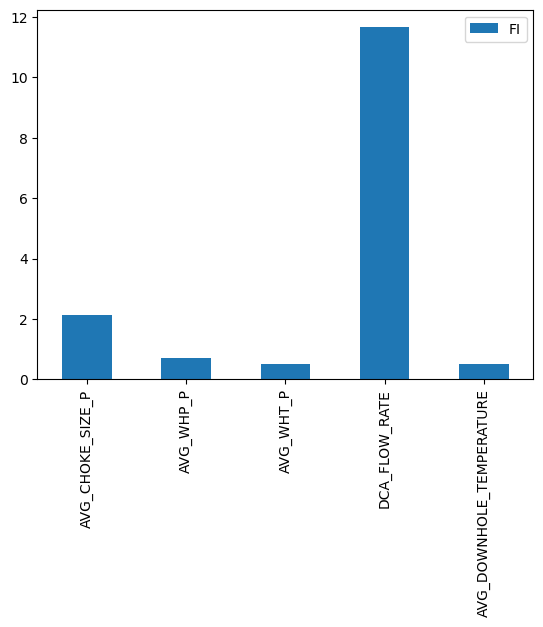

In [ ]:
fi_df = pd.DataFrame(data = np.abs(sgd_reg.coef_), index = features, columns = ["FI"])
fi_df.plot.bar()

### SGD Regressor with l1 regularization

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg_l1 = SGDRegressor(penalty = "l1", alpha = 0.001)
sgd_reg_l1.fit(X_train_dca, y_train)

SGDRegressor(alpha=0.001, penalty='l1')

In [ ]:
mean_squared_error(y_val, sgd_reg_l1.predict(X_val_dca))

1.0461821640737172

In [ ]:
mean_squared_error(y_train, sgd_reg_l1.predict(X_train_dca))

8.40113956965692

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


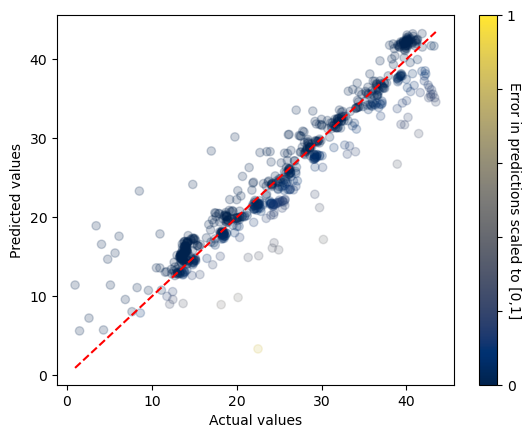

In [ ]:
predict_plot(y_train, sgd_reg_l1.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


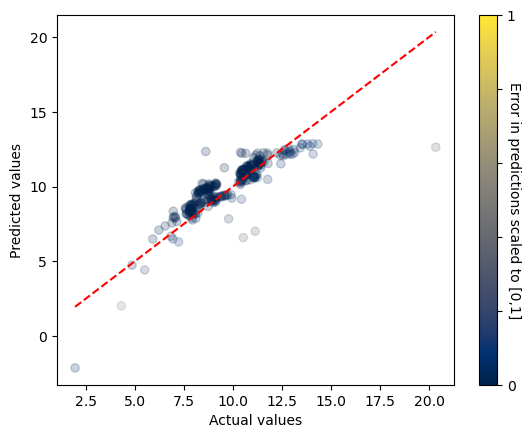

In [ ]:
predict_plot(y_val, sgd_reg_l1.predict(X_val_dca))

<AxesSubplot: >

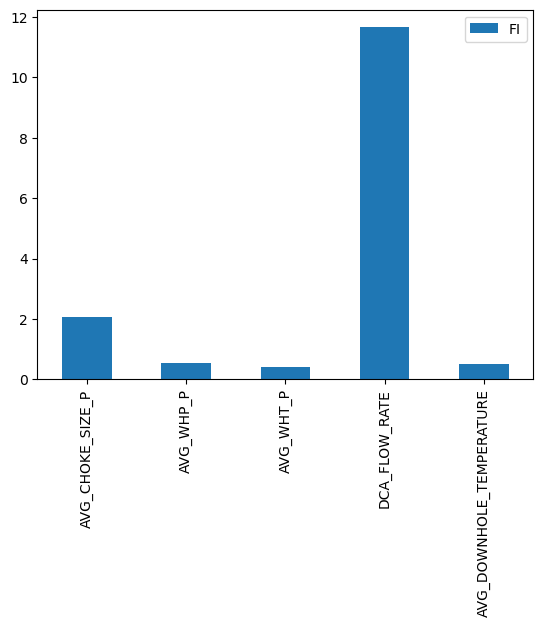

In [ ]:
fi_df = pd.DataFrame(data = np.abs(sgd_reg_l1.coef_), index = features, columns = ["FI"])
fi_df.plot.bar()

### SGD Regressor with l2 regularization

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg_l2 = SGDRegressor(penalty = "l2")
sgd_reg_l2.fit(X_train_dca, y_train)

SGDRegressor()

In [ ]:
mean_squared_error(y_val, sgd_reg_l1.predict(X_val_dca))

1.0461821640737172

In [ ]:
mean_squared_error(y_train, sgd_reg_l1.predict(X_train_dca))

8.40113956965692

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


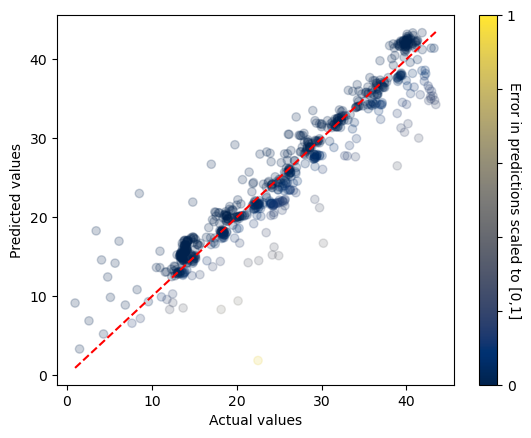

In [ ]:
predict_plot(y_train, sgd_reg_l2.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


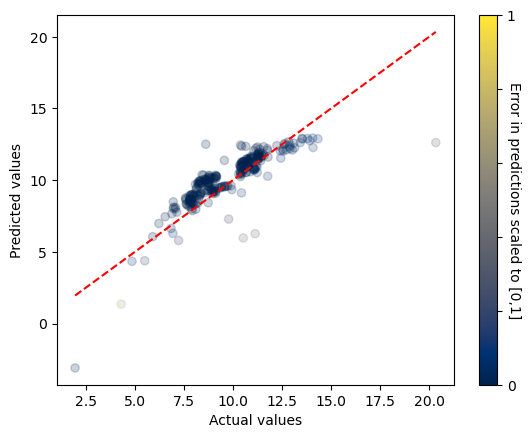

In [ ]:
predict_plot(y_val, sgd_reg_l2.predict(X_val_dca))

<AxesSubplot: >

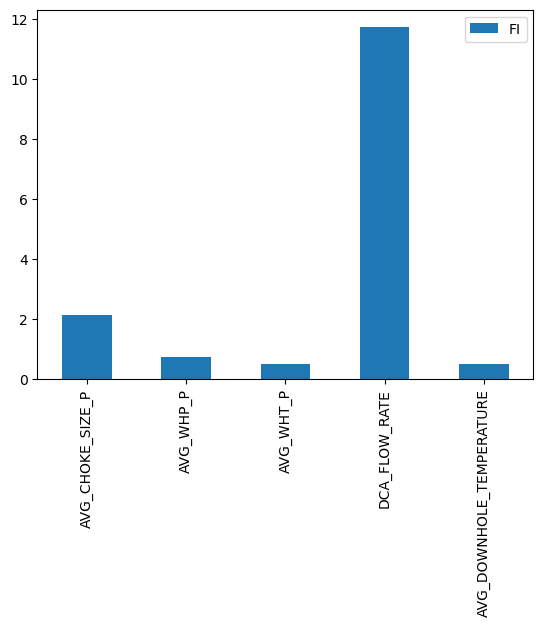

In [ ]:
fi_df = pd.DataFrame(data = np.abs(sgd_reg_l2.coef_), index = features, columns = ["FI"])
fi_df.plot.bar()

***

## 2. Trying SVM

### 2.1 SVM RBF Kernel

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_dca, y_train)

SVR()

In [ ]:
mean_squared_error(y_val, svr.predict(X_val_dca))

5.762330128944004

In [ ]:
mean_squared_error(y_train, svr.predict(X_train_dca))

9.671417055886057

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


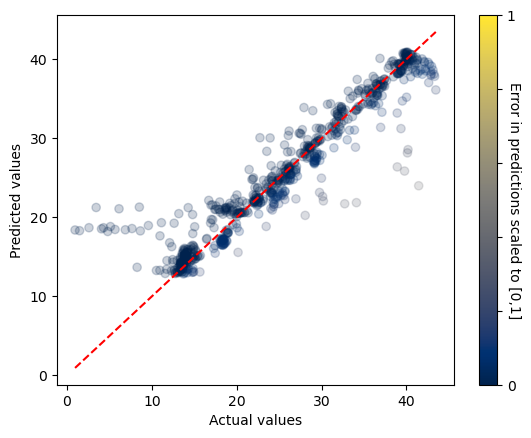

In [ ]:
predict_plot(y_train, svr.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


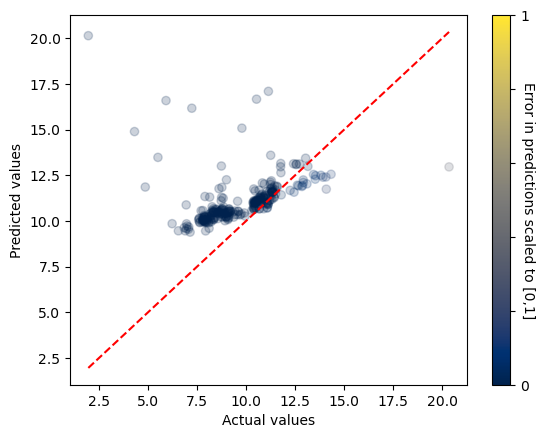

In [ ]:
predict_plot(y_val, svr.predict(X_val_dca))

### 2.2 SVM Poly kernel

Degree = 3

In [ ]:
from sklearn.svm import SVR
svm_poly_3 = SVR(kernel = "poly", degree = 3)
svm_poly_3.fit(X_train_dca, y_train)

SVR(kernel='poly')

In [ ]:
mean_squared_error(y_val, svm_poly_3.predict(X_val_dca))

32.7920290135539

In [ ]:
mean_squared_error(y_train, svm_poly_3.predict(X_train_dca))

17.37411230068175

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


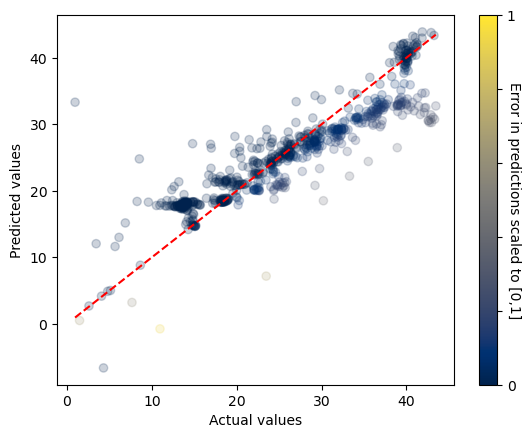

In [ ]:
predict_plot(y_train, svm_poly_3.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


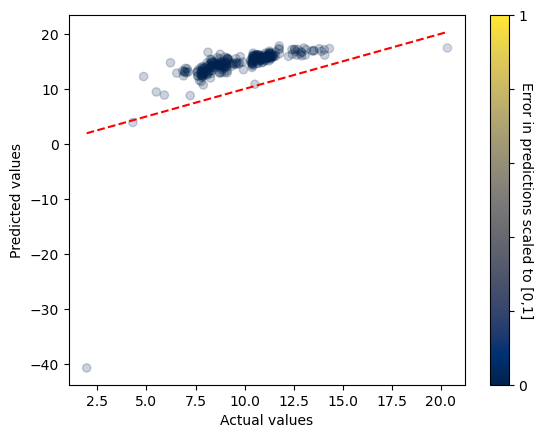

In [ ]:
predict_plot(y_val, svm_poly_3.predict(X_val_dca))

***

## 3. Trying KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=8)
knn_reg.fit(X_train_dca, y_train)

KNeighborsRegressor(n_neighbors=8)

In [ ]:
mean_squared_error(y_val, knn_reg.predict(X_val_dca))

21.986692280399176

In [ ]:
mean_squared_error(y_train, knn_reg.predict(X_train_dca))

7.4573078263124835

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


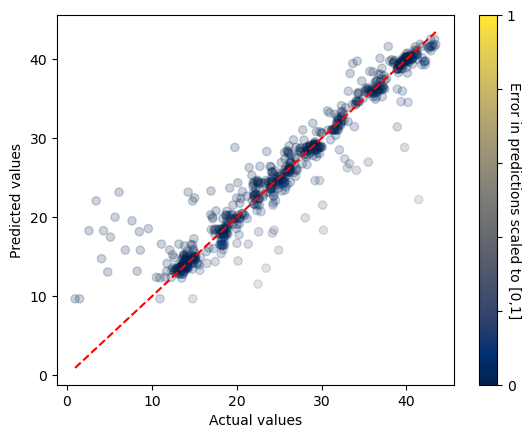

In [ ]:
predict_plot(y_train, knn_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


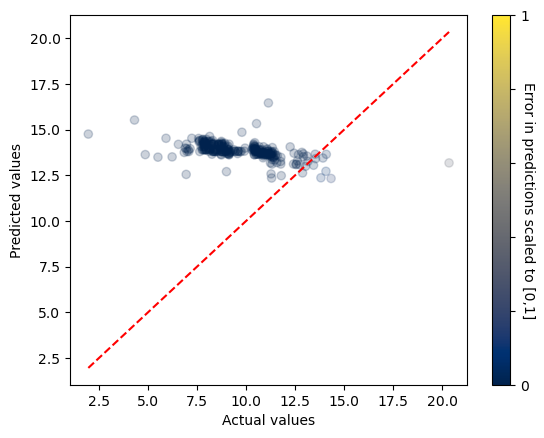

In [ ]:
predict_plot(y_val, knn_reg.predict(X_val_dca))

***

## 4. Trying Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train_dca, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
mean_squared_error(rf.predict(X_val_dca), y_val)

24.668444833164738

In [ ]:
mean_squared_error(y_train, rf.predict(X_train_dca))

0.6342349895942495

Such a significant difference in the mean squared error between training predictions and validation predictions signifies that the Random Forest model is overfitting

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


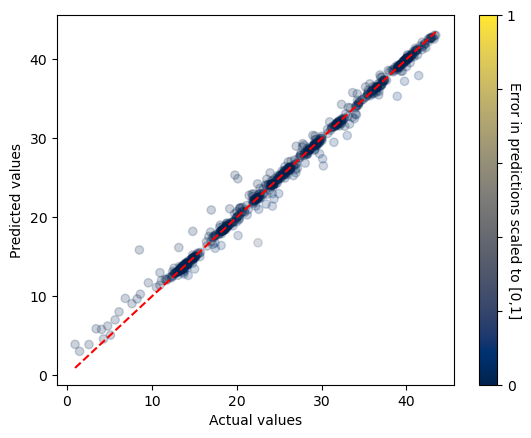

In [ ]:
predict_plot(y_train, rf.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


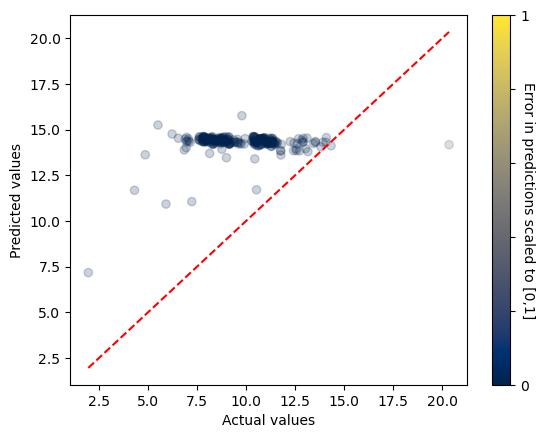

In [ ]:
predict_plot(y_val, rf.predict(X_val_dca))

Feature importance in the Random Forest Model

<AxesSubplot: >

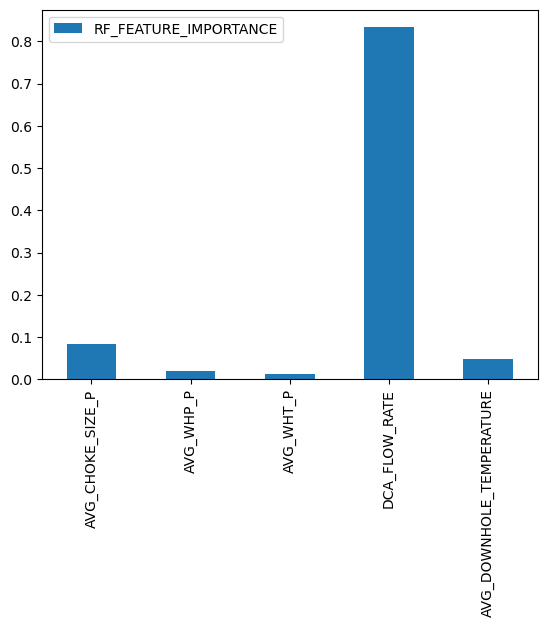

In [ ]:
rf_fi = rf.feature_importances_
df_fi = pd.DataFrame(data = rf_fi, index = features_sub, columns=["RF_FEATURE_IMPORTANCE"])
df_fi.plot.bar()

***

## 5. Gradient Boosting

Using XGBRegressor

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_dca, y_train, eval_set = [(X_val_dca, y_val)], verbose = 2, early_stopping_rounds = 10)

[0]	validation_0-rmse:5.56736
[2]	validation_0-rmse:1.94133
[4]	validation_0-rmse:2.39299
[6]	validation_0-rmse:3.32930
[8]	validation_0-rmse:3.89053
[10]	validation_0-rmse:4.05330
[11]	validation_0-rmse:4.43890


C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
mean_squared_error(y_train, xgb_reg.predict(X_train_dca))

90.12054105609593

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


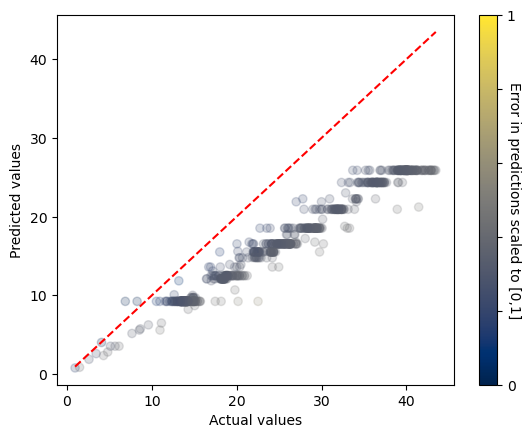

In [ ]:
predict_plot(y_train, xgb_reg.predict(X_train_dca))

Using Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grd_reg = GradientBoostingRegressor(n_estimators = 150)
grd_reg.fit(X_train_dca, y_train)

GradientBoostingRegressor(n_estimators=150)

In [ ]:
mean_squared_error(y_train, grd_reg.predict(X_train_dca))

0.5762447036739687

In [ ]:
mean_squared_error(y_val, grd_reg.predict(X_val_dca))

32.82695403374508

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


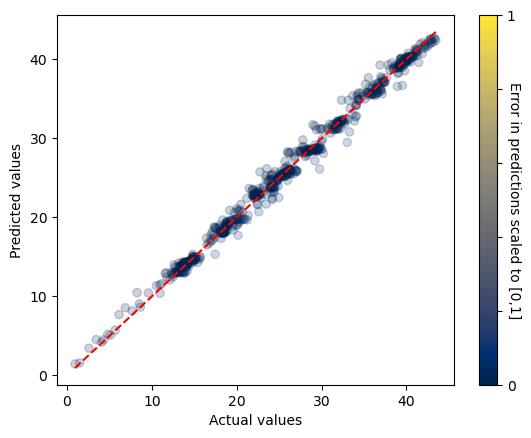

In [ ]:
predict_plot(y_train, grd_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


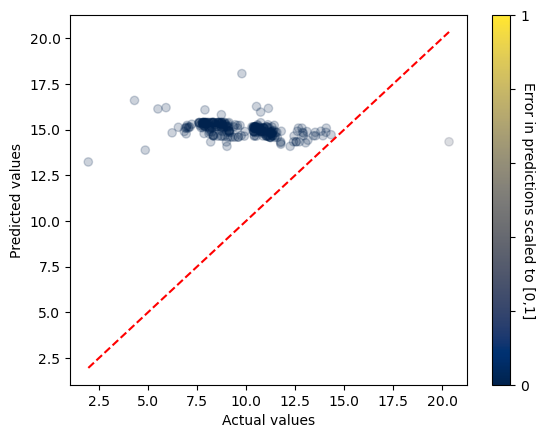

In [ ]:
predict_plot(y_val, grd_reg.predict(X_val_dca))

***

## 6. Neural Networks

### 6.1 MLP Regressor using scikitlearn

In [ ]:
## Trying MLP lyers from scikit-learn

from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor([100,10,1], max_iter = 10000, verbose = 2)
mlp_reg.fit(X_train_dca, y_train)

In [ ]:
mean_squared_error(y_val, mlp_reg.predict(X_val_dca))

1.9780544223932748

In [ ]:
mean_squared_error(y_train, mlp_reg.predict(X_train_dca))

3.172546145775134

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


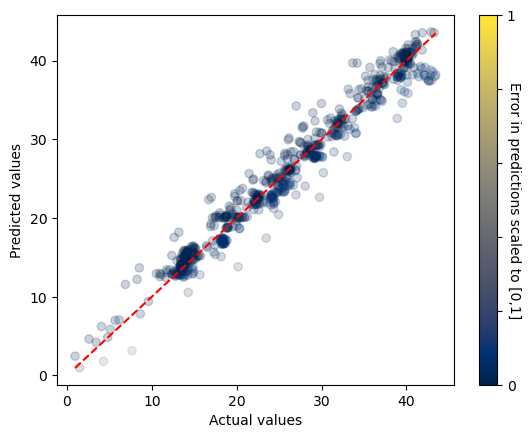

In [ ]:
predict_plot(y_train, mlp_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


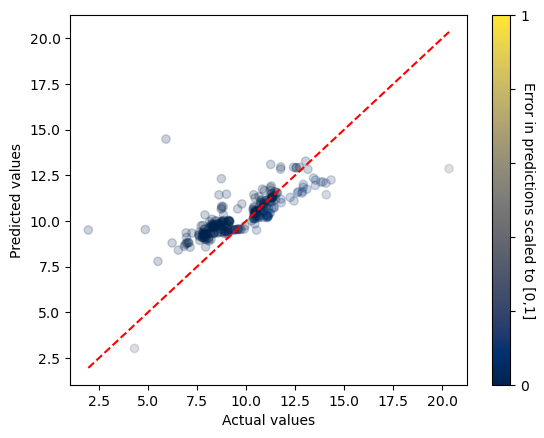

In [ ]:
predict_plot(y_val, mlp_reg.predict(X_val_dca))

### 6.2 Tensorflow fully connected sequential neural network

In [ ]:
nn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[X_train_dca.shape[1]]),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "relu"),
    keras.layers.Dense(1, activation = "relu"),
])
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               600       
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.mean_squared_error)
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", restore_best_weights=True, patience=100)
history = nn.fit(X_train_dca, y_train, epochs = 1000, validation_data = (X_val_dca, y_val), callbacks=[early_stopping])

In [ ]:
mean_squared_error(y_val, nn.predict(X_val_dca))

9/9 [==============================] - 0s 1ms/step


1.2978080005763064

In [ ]:
mean_squared_error(y_train, nn.predict(X_train_dca))

23/23 [==============================] - 0s 1ms/step


5.642546863738536

23/23 [==============================] - 0s 1ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


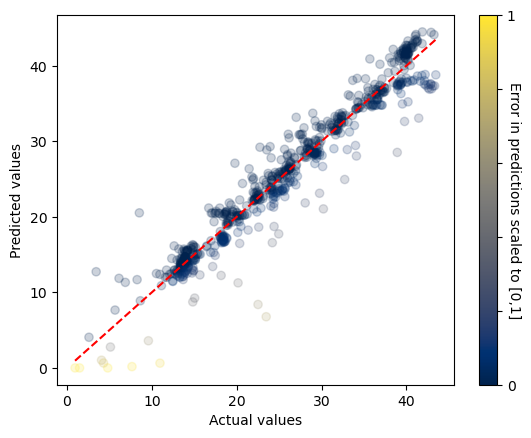

In [ ]:
predict_plot(y_train, nn.predict(X_train_dca).ravel())

9/9 [==============================] - 0s 1ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


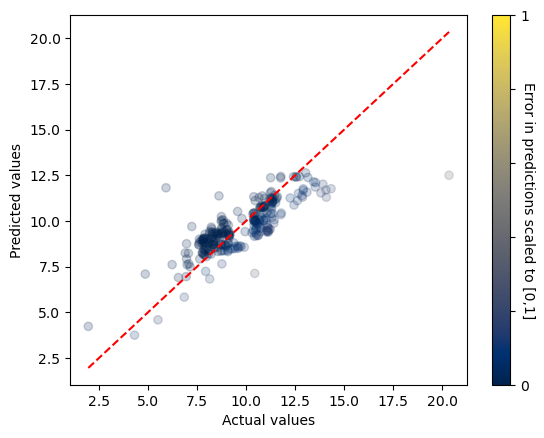

In [ ]:
predict_plot(y_val, nn.predict(X_val_dca).ravel())

### 6.3.0 RNN Preparation

Checking the mse if we predict the flow rate to be the same as the previous flow rate

In [64]:
error = mean_squared_error(y_train[1:], y_train[:-1])
print(f"We will get an mean squared error of {error:.2f} on the training data if we just assume that the flow rate at time 't-1' is going to be the flow rate at time 't'")

We will get an mean squared error of 16.48 on the training data if we just assume that the flow rate at time 't-1' is going to be the flow rate at time 't'


Preparing the dataset for sequence to sequence

In [65]:
## Creating a function to prepare dataset for sequence to sequence RNN model

def seq_2_seq(X, y, window_size = 5, batch_size = 5):
    dt = np.c_[X, y]
    dt = tf.data.Dataset.from_tensor_slices(dt)
    dt = dt.window(size = window_size, shift = 1, drop_remainder=True)
    dt = dt.flat_map(lambda x: x.batch(window_size))
    dt = dt.map(lambda x: (x[:, :-1], x[:, -1]))
    dt = dt.batch(batch_size).prefetch(1)
    return dt

In [66]:
## Preparing the data using the above function
window = 3
batch_size = 10

train_dt = seq_2_seq(X_train_dca, y_train, window, batch_size)
val_dt = seq_2_seq(X_val_dca, y_val, window, batch_size)
test_dt = seq_2_seq(X_test_dca, y_test, window, batch_size)

In [ ]:
for i in train_dt.take(2):
    print(i)

***

Creating a function to calculate the mean squared error for RNN models

In [107]:
## Creating a function to calculate the mean squared error for RNN and plot crossplot of actual vs predcited
## by taking rnn model, window size, dataset (X,y) and y values as input

def rnn_mse(model, window_size, dt, y):
    preds = model.predict(dt)
    preds = preds[:, -1 :].ravel()
    predict_plot(y[window_size-1:], preds)
    return mean_squared_error(y[window_size-1:], preds)

***

Creating a function to find the optimum window size

In [ ]:
from collections import defaultdict
def (model, window_trials, epochs = 200, train_dataset, val_dataset):
  history_dict = defaultdict(int)
  min_train_loss = defaultdict(int)
  min_val_loss = defaultdict(int)
  
  for window in window_trials:
    history_dict[window] = model.fit(train_dataset, epochs = epochs, validation_data=val_dataset)
    min_train_loss[window] = np.min(history_dict[window].history["loss"])
    min_val_loss[window] = np.min(history_dict[window].history["val_loss"])

In [113]:
from collections import defaultdict
ex = defaultdict(str)

In [114]:
ex["0"]

''

***

### 6.3.1 Simple RNN

In [ ]:
simple_rnn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[window, 5]),
    keras.layers.Bidirectional(keras.layers.SimpleRNN(30, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.SimpleRNN(10, return_sequences=True)),
    keras.layers.Dense(1)
])
simple_rnn.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_36 (Bidirecti  (None, 3, 60)            2160      
 onal)                                                           
                                                                 
 bidirectional_37 (Bidirecti  (None, 3, 20)            1420      
 onal)                                                           
                                                                 
 dense_42 (Dense)            (None, 3, 1)              21        
                                                                 
Total params: 3,601
Trainable params: 3,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epoch_opt = 100 ##Optimum number of epochs for this model
simple_rnn.compile(optimizer = keras.optimizers.Adam(), loss=keras.losses.mean_squared_error)
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 20, restore_best_weights=True)
history = simple_rnn.fit(train_dt, epochs = epoch_opt, validation_data=val_dt
#                    , callbacks=[early_stopping]
                  )

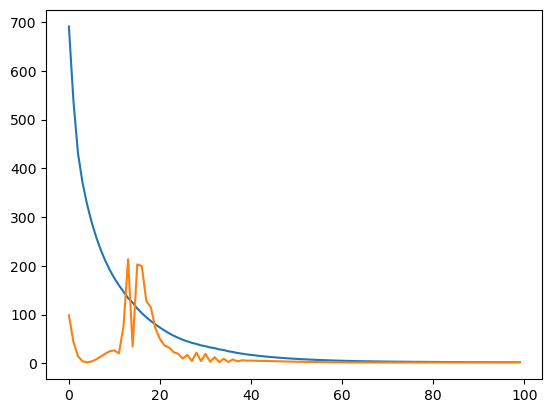

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
# plt.axis([50, 200, 0, 20])

In [ ]:
## Creating a function to calculate the mean squared error for RNN and plot crossplot of actual vs predcited
## by taking rnn model, window size, dataset (X,y) and y values as input

def rnn_mse(model, window_size, dt, y):
    preds = model.predict(dt)
    preds = preds[:, -1 :].ravel()
    predict_plot(y[window_size-1:], preds)
    return mean_squared_error(y[window_size-1:], preds)

In [ ]:
rnn_mse(model = simple_rnn, window_size = window, dt = train_dt, y = y_train)

In [ ]:
rnn_mse(model = simple_rnn, window_size = window, dt = val_dt, y = y_val)

***

### 6.3.2 LSTM

In [69]:
lstm = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[window, 5]),
    keras.layers.Bidirectional(keras.layers.LSTM(30, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(10, return_sequences=True)),
    keras.layers.Dense(1)
])
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 3, 60)            8640      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 3, 20)            5680      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3, 1)              21        
                                                                 
Total params: 14,341
Trainable params: 14,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epoch_opt = 140 ##Optimum number of epochs for this model

lstm.compile(optimizer = keras.optimizers.Adam(), loss=keras.losses.mean_squared_error)
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 20, restore_best_weights=True)
history = lstm.fit(train_dt, epochs = epoch_opt, validation_data=val_dt
#                    , callbacks=[early_stopping]
                  )

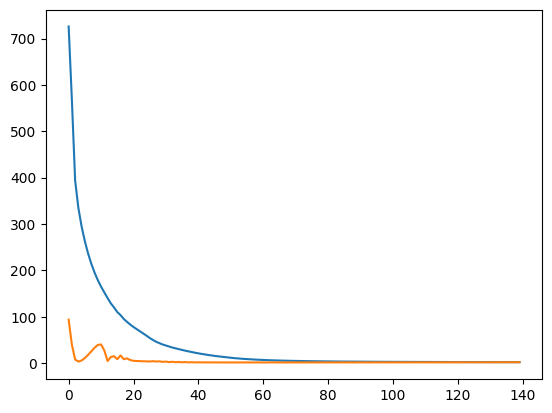

In [74]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
# plt.axis([125, 150, 0, 20])

71/71 [==============================] - 0s 4ms/step


<ipython-input-50-d891e12cce5b>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("cividis")
<ipython-input-50-d891e12cce5b>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-50-d891e12cce5b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


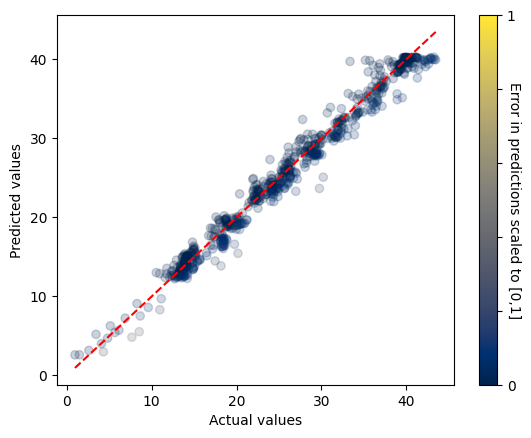

1.789633598396069

In [108]:
rnn_mse(model = lstm, window_size = window,  dt = train_dt, y = y_train)

27/27 [==============================] - 0s 5ms/step


<ipython-input-50-d891e12cce5b>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("cividis")
<ipython-input-50-d891e12cce5b>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-50-d891e12cce5b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


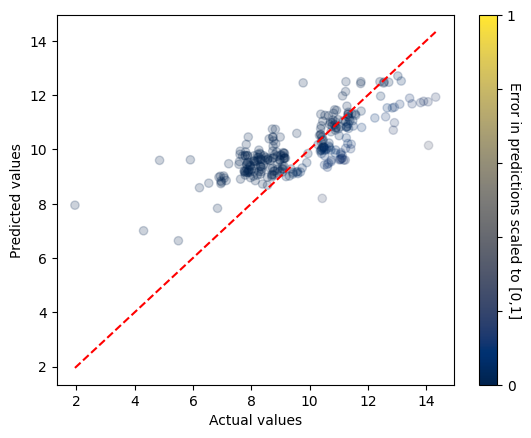

1.6440201123046634

In [109]:
rnn_mse(model = lstm, window_size = window, dt = val_dt, y = y_val)

***

### 6.3.3 GRU

In [ ]:
gru = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[window, 5]),
    keras.layers.Bidirectional(keras.layers.GRU(30, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.GRU(10, return_sequences=True)),
    keras.layers.Dense(1)
])
gru.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_30 (Bidirecti  (None, 3, 60)            6660      
 onal)                                                           
                                                                 
 bidirectional_31 (Bidirecti  (None, 3, 20)            4320      
 onal)                                                           
                                                                 
 dense_38 (Dense)            (None, 3, 1)              21        
                                                                 
Total params: 11,001
Trainable params: 11,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epoch_opt = 120 ## Optimum number of epochs from experiment for this model

gru.compile(optimizer = keras.optimizers.Adam(), loss=keras.losses.mean_squared_error)
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 20, restore_best_weights=True)
history = gru.fit(train_dt, epochs = epoch_opt, validation_data=val_dt
#                    , callbacks=[early_stopping]
                  )

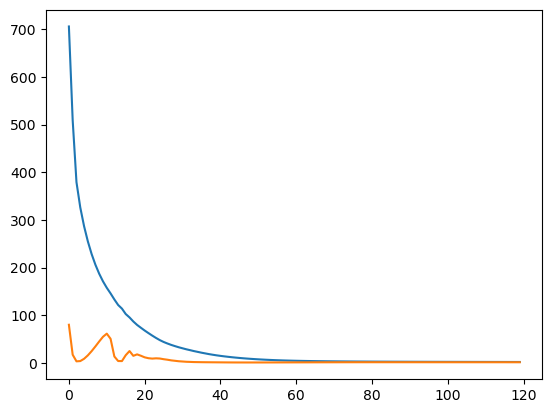

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
# plt.axis([50, 200, 0, 20])

In [ ]:
## Creating a function to calculate the mean squared error for RNN and plot crossplot of actual vs predcited
## by taking rnn model, window size, dataset (X,y) and y values as input

def rnn_mse(model, window_size, dt, y):
    preds = model.predict(dt)
    preds = preds[:, -1 :].ravel()
    predict_plot(y[window_size-1:], preds)
    return mean_squared_error(y[window_size-1:], preds)

71/71 [==============================] - 3s 3ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_22336\4171811159.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  predict_plot(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


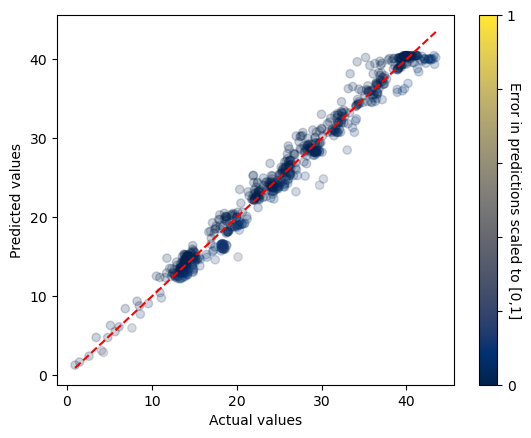

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\4171811159.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


1.7336864123170452

In [ ]:
rnn_mse(model = gru, window_size = window, dt = train_dt, y = y_train)

27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_22336\4171811159.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  predict_plot(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_22336\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


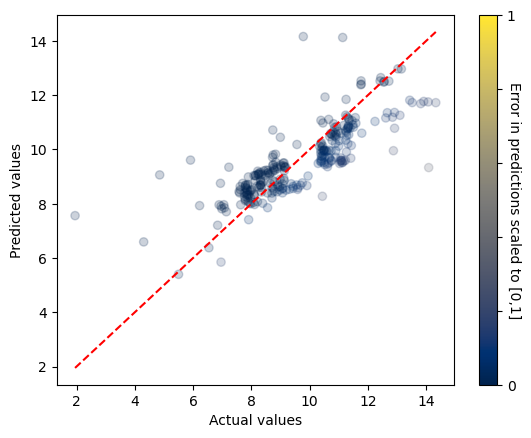

C:\Users\spect\AppData\Local\Temp\ipykernel_22336\4171811159.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


1.1836003660128032

In [ ]:
rnn_mse(model = gru, window_size = window, dt = val_dt, y = y_val)